In [1]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython import display
import cv2
from scipy.interpolate import splprep, splev
import os

In [2]:
model = YOLO(model='/home/sebastian/robogistics/robologics_brause/src/robogistics_brause/robogistics_brause/object_detection/Yolov8_model/weights/best.pt')
img_path = '/home/sebastian/robogistics/robologics_brause/src/robogistics_brause/robogistics_brause/object_detection/sebbi.png'


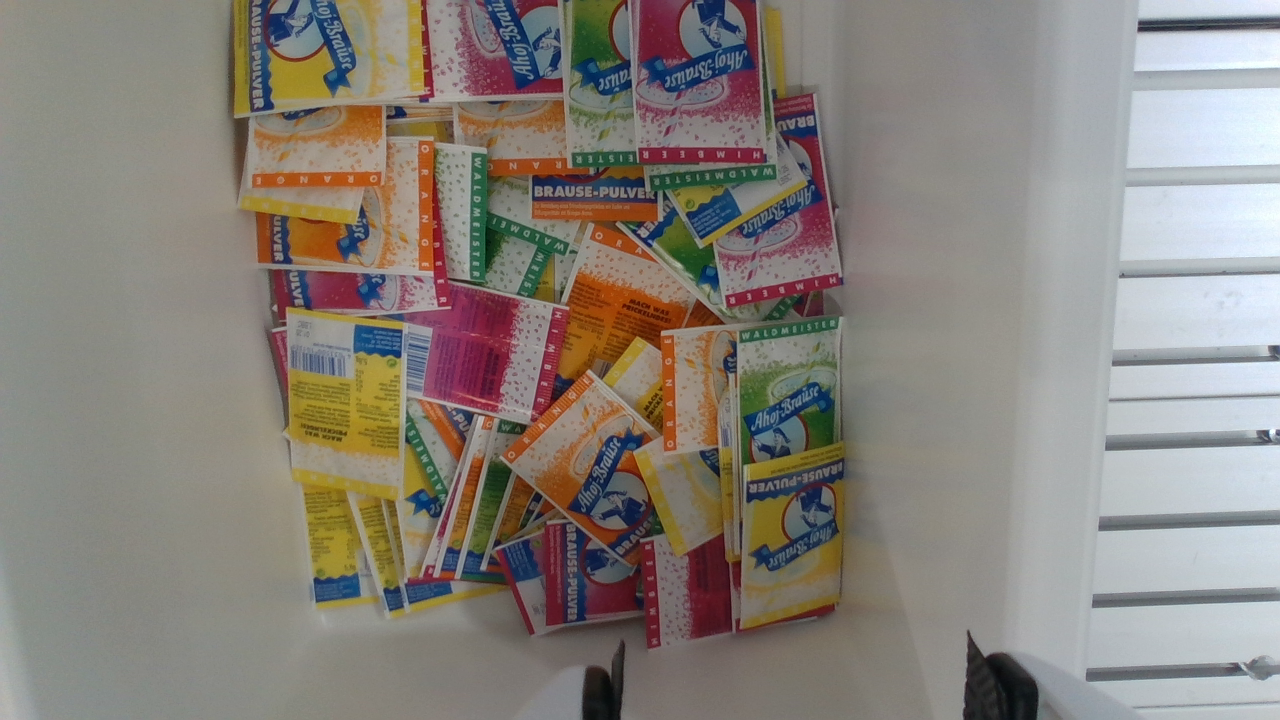

In [3]:
display.Image(img_path)

In [4]:


img = cv2.imread(img_path)
results = model.predict(source=img_path, save=False, save_txt=False, stream=True)
for result in results: # only on result in results
    
    # get array results
    all_masks = result.masks.data
    boxes = result.boxes.data
    color = boxes[:, 5] #
    idx_masks_color = torch.where(color == 0) # index of the chosen coulour
    # use these indices to extract the relevant masks
    for index in idx_masks_color:
        color_masks = all_masks[index]
        result_masks = [[],[]]
        for i in range(len(color_masks)):

            result_mask = color_masks[i].cpu().numpy()
            result_masks[0].append(np.count_nonzero(result_mask))
            result_masks[1].append(result_mask)

final_mask_size_list, final_mask_list = (list(t) for t in zip(*sorted(zip(result_masks[0], result_masks[1]), reverse=True)))


binary_array = np.where(final_mask_list[0] != 0, 1, 0)

binary_array = binary_array.astype('uint8')

resized_binary_array = cv2.resize(binary_array,(1280, 720))
#resized_binary_array = np.resize(binary_array, (img.shape[0], img.shape[1]))

binary_image = Image.fromarray(resized_binary_array.astype('uint8')*255)

binary_image.save('binary_image.png')

    

2023-06-22 18:39:36.832741: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

image 1/1 /home/sebastian/robogistics/robologics_brause/src/robogistics_brause/robogistics_brause/object_detection/sebbi.png: 384x640 14 greens, 12 oranges, 11 reds, 17 yellows, 85.9ms
Speed: 1.7ms preprocess, 85.9ms inference, 45.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
def get_YOLO_mask():


    


In [5]:
def getPixelCoordinates(mask, color_image):
        
        
        contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # find contours
        biggest_contour = max(contours, key = cv2.contourArea) # find the biggest contour (c) by the area

        # find the center of the contour
        M = cv2.moments(biggest_contour)
        x_pixelkoordinate = int(M['m10']/M['m00'])
        y_pixelkoordinate = int(M['m01']/M['m00'])

        # find the spline
        tck, u = splprep(biggest_contour[:,0,:].T, s=0.0)    
        u_new = np.linspace(u.min(), u.max(), 1000) 
        x_new, y_new = splev(u_new, tck, der=0)

        # Create the "images" folder if it doesn't exist
        filename = "binary_YOLO_test.png"
        # Show the original image with the contour
        image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.plot(x_new, y_new, 'r')
        plt.plot(x_pixelkoordinate, y_pixelkoordinate, 'bo') 

        # Save the plot image in the "images_realsense/" folder with the filename
        plt.savefig(filename)

        return x_pixelkoordinate, y_pixelkoordinate

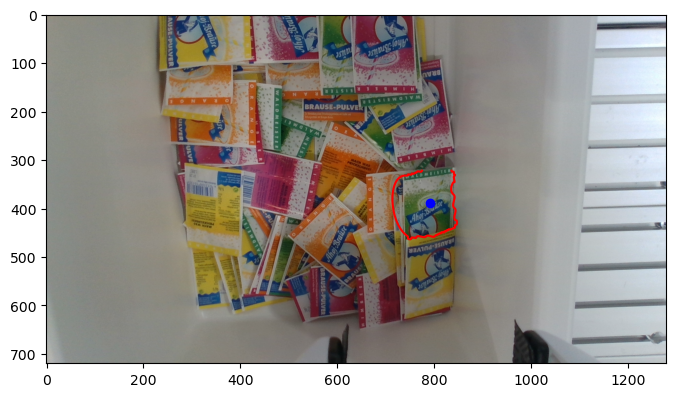

In [6]:
binary_array = binary_array.astype('uint8')
resized_binary_array = resized_binary_array.astype('uint8')



x,y = getPixelCoordinates(resized_binary_array, img)

